# Machine Learning Project

### Packages

In [257]:
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from numpy.random import random, seed
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import display
from scipy.stats import norm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import itertools

## Functions

In [299]:
def drop_columns(boston_df, low_thresh, high_thresh=1, show=False):
    ''' Function takes in a value of thresholding and return the filtered dataframe, excluding already the target columns'''
    
    #print the correlation matrix
    corr_matrix = boston_df.corr().round(2)
    
    #show correlation matrix
    if show:
        sns.heatmap(data=corr_matrix, annot=True)
        
    array_corr = corr_matrix["MEDV"].abs()
    indices = np.arange(array_corr.shape[0])
    col_indi = indices[(array_corr < low_thresh) | (array_corr >= high_thresh)]
    filtered_boston = boston_df.drop(boston_df.columns[col_indi], axis=1)  
    print(filtered_boston.columns,filtered_boston.shape)
    return filtered_boston


def drop_columns(boston_df, low_thresh, high_thresh=1, show=False):
    ''' Function takes in a value of thresholding and return the filtered dataframe, excluding already the target columns'''
    
    
    #print the correlation matrix
    corr_matrix = boston_df.corr().round(2)
    
    #show correlation matrix
    if show:
        sns.heatmap(data=corr_matrix, annot=True)
        
    array_corr = corr_matrix["MEDV"].abs()
    indices = np.arange(array_corr.shape[0])
    
    col_indi = indices[(array_corr < low_thresh) | (array_corr >= high_thresh)]
    
    display(corr_matrix)
    
    #eliminating colinearity by selecting only one of more highly correlated features
    
    #colinearity threshold
    colin_thresh = 0.75
    
    colin_vars = []
    
    for ind,col in itertools.product(corr_matrix.columns,corr_matrix.index):
        if (abs(corr_matrix[ind][col])>colin_thresh and ind !=col):
            colin_vars.append((ind,col))
            
    colin_used = []
    for (ind1,ind2) in colin_vars:
        if not (ind1 in colin_used or ind2 in colin_used):
            colin_used.append(ind1)
    print(colin_used)
    
    filtered_boston = boston_df.drop(boston_df.columns[col_indi], axis=1).drop(colin_used, axis=1)
    
    print(filtered_boston.columns,filtered_boston.shape)
    
    return filtered_boston



#Important to split the data set before shuffling 
def bootstrap_OLS(X_train, X_test, z_train, z_test, n_bootstrap): 
    MSE = np.zeros((n_bootstrap,2))
    n = len(z_train)
    
    z_tilde_train_ols_aux = np.empty(n)
    z_tilde_test_ols_aux = np.empty(n)
    
    for i in range(n_bootstrap):
        sequence = np.random.randint(0,n,n)
        X1_train = X_train[sequence]
               
        z1_train = z_train[sequence]  
        
        
        z_tilde_train_ols_aux , z_tilde_test_ols_aux = OLS(X1_train, X_test, z1_train)
        
        MSE[i,0] = mean_squared_error(z1_train, z_tilde_train_ols_aux) 
        MSE[i,1] = mean_squared_error(z_test,z_tilde_test_ols_aux)  
        
    return MSE



def OLS(X_train, X_test, z_train):
    '''
    Fit the model with OLS regression using the train set and 
    returns the predicted values for both the train and the test set.
    '''
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train= scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # # Apply the transform to both the training set and the test set

    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    z_train =np.asarray(z_train)                  # Series to array
    z_train = z_train.reshape(len(z_train),1)     # Reshape because standard scaler expects 2D

    target_scaler = StandardScaler()
    target_scaler.fit(z_train)
    z_train= target_scaler.transform(z_train)

    #extract regression coefficients
    beta_ols = np.linalg.pinv(X_train.T@X_train)@(X_train.T)@z_train
    
    #predict train and test values
    z_train_tilde_ols = X_train@beta_ols
    z_test_tilde_ols = X_test@beta_ols
    
    # Do the inverse transformation to compare the targets and find the MSE
        
    z_train = target_scaler.inverse_transform(z_train)
    z_train_tilde_ols = target_scaler.inverse_transform(z_train_tilde_ols)
    z_test_tilde_ols = target_scaler.inverse_transform(z_test_tilde_ols)
    
    return z_train_tilde_ols, z_test_tilde_ols



def Ridge(X_train,X_test,z_train,z_test,lambd):

    # Since it relates to remove intercepts, better to use built in function in SKL
    RegRidge = linear_model.Ridge(lambd,fit_intercept= True)
    
    # Scaling
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train= scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    

    # # Apply the transform to both the training set and the test set

    #pca.fit(X_train)
    #X_train_pca = pca.transform(X_train)
    #X_test_pca = pca.transform(X_test)
    
    z_train =np.asarray(z_train)                  # Series to array
    z_train = z_train.reshape(len(z_train),1)     # Reshape because standard scaler expects 2D
    
    target_scaler = StandardScaler()
    target_scaler.fit(z_train)
    z_train = target_scaler.transform(z_train)    
    
    #fit the model to the training data
    RegRidge.fit(X_train,z_train)
    
    # and then make the prediction
    z_tilde_train = RegRidge.predict(X_train)
    z_tilde_test = RegRidge.predict(X_test)
    
    # Do the inverse transformation to compare the targets and find the MSE
        
    z_train = target_scaler.inverse_transform(z_train)              # Not necessary because we dont compute MSE here
    z_tilde_train = target_scaler.inverse_transform(z_tilde_train)
    z_tilde_test = target_scaler.inverse_transform(z_tilde_test)
    
    return z_tilde_train, z_tilde_test

def bootstrap_Ridge(X_train, X_test, z_train, z_test, n_bootstrap, lambd): 
    n = len(z_train)
    #prepare arrays for output
    MSE = np.zeros((n_bootstrap,2))
#     z_tilde_train = np.zeros((len(z_train), n_bootstrap))
#     z_tilde_test = np.zeros((len(z_test), n_bootstrap))
    
    z_tilde_train_aux = np.empty(n)
    z_tilde_test_aux = np.empty(n)
    
    
    
    #cycle on resamplings
    for i in range(n_bootstrap):
        
        #extract sequence for resampling
        sequence = np.random.randint(0,n,n)
        
        #resampled arrays
        X1_train = X_train[sequence]
        z1_train = z_train[sequence]
        
        #fit and predict
        z_tilde_train_aux , z_tilde_test_aux = Ridge(X1_train, X_test, z1_train, z_test, lambd)
        
        #calculate mse on train and test
        MSE[i,0] = mean_squared_error(z1_train,z_tilde_train_aux)
        MSE[i,1] = mean_squared_error(z_test,z_tilde_test_aux)
    
      #  MSE_train_mean = np.mean(MSE[:,0])
      #  MSE_test_mean = np.mean(MSE[:,1])
        
    return z_tilde_train_aux, z_tilde_test_aux, MSE

def cross_validation_Ridge(k_folds, X, z, lambd):
    MSE_train = []
    MSE_test = []
    kfold = KFold(n_splits = k_folds)

    for train_inds, test_inds in kfold.split(X):
        
        X_train = X[train_inds]
        z_train = z[train_inds]

        X_test = X[test_inds]
        z_test = z[test_inds]

        z_train_tilde_Ridge, z_test_tilde_Ridge = Ridge( X_train, X_test, z_train, z_test, lambd)
        
        MSE_train.append(mean_squared_error(z_train, z_train_tilde_Ridge))
        MSE_test.append(mean_squared_error(z_test, z_test_tilde_Ridge))

    MSE_train_mean = np.mean(MSE_train)
    MSE_test_mean = np.mean(MSE_test)
    
    return MSE_train_mean, MSE_test_mean

def cross_validation_OLS(k_folds, X, z):
    MSE_train = []
    MSE_test = []
    kfold = KFold(n_splits = k_folds)
    for train_inds, test_inds in kfold.split(X):
        X_train = X[train_inds]
        z_train = z[train_inds]
        
        X_test = X[test_inds]
        z_test = z[test_inds]
        
        z_train_tilde_ols , z_test_tilde_ols = OLS(X_train, X_test, z_train)
        
        MSE_train.append(mean_squared_error(z_train, z_train_tilde_ols))
        MSE_test.append(mean_squared_error(z_test, z_test_tilde_ols))
        
    MSE_train_mean = np.mean(MSE_train)
    MSE_test_mean = np.mean(MSE_test)
    return MSE_train_mean, MSE_test_mean
    

## Data 

In [159]:
boston_data = load_boston()
boston_df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
boston_df['MEDV'] = boston_data.target
features = boston_df.columns.tolist() 
print(features[:-1])
print("Size of data set: {} ".format(boston_df.shape))

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
Size of data set: (506, 14) 


In [296]:
x = drop_columns(boston_df,0.35)
x = boston_df.drop("MEDV",axis=1)
z = boston_df['MEDV']
#pca = PCA(n_components=0.95)



rnd_state = 79

n_bs = 50

k_folds = 5



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


['INDUS', 'NOX', 'RAD']
Index(['CRIM', 'ZN', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object') (506, 7)


## 1. OLS using no resampling method

In [ ]:
#degree of the polynomial model
maxdegree = 5

#target feature


polydegree = np.zeros(maxdegree)
MSE_OLS = np.zeros((maxdegree,2))





for degree in range(maxdegree):
    
    #set up the model
    poly = PolynomialFeatures(degree+1)
    
    X = poly.fit_transform(x)
    
    
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state = rnd_state)
    
    polydegree[degree] = degree+1
    
    z_train_tilde_ols , z_test_tilde_ols = OLS(X_train, X_test, z_train) 
    
    MSE_OLS[degree, 0] = mean_squared_error(z_train,z_train_tilde_ols)
    MSE_OLS[degree, 1] = mean_squared_error(z_test,z_test_tilde_ols) 
    print("Degree",degree)
    print("MSE train ",MSE_OLS[degree, 0])
    print("MSE test", MSE_OLS[degree, 1])

#plot the results
plt.figure()
plt.plot(polydegree,MSE_OLS[:,0],label='MSE_Train')
plt.plot(polydegree,MSE_OLS[:,1],label='MSE_Test')
plt.xlabel('Complexity(polynomial degree)')
plt.ylabel('MSE')
#plt.ylim(0,1000)
plt.yscale("log")
plt.legend()
plt.show()

print("Minimum MSE reached : {:.1f} \n for degree : {}".format(np.min(MSE_OLS[:,1]),polydegree[np.argmin(MSE_OLS[:,1])]))

## 2. OLS with resampling methods

For degree  1
MSE_boot_train  21.786765336114897
MSE_boot_test  19.997907928843066
MSE_cv_train  20.73508462988618
MSE_cv_test  37.13180746769895
For degree  2
MSE_boot_train  4.333857485495766
MSE_boot_test  19.031971906072044
MSE_cv_train  4.9784646378754775
MSE_cv_test  135.3961157962081
For degree  3
MSE_boot_train  9.932788358617123e-16
MSE_boot_test  8353.794208197643
MSE_cv_train  0.042362857318252664
MSE_cv_test  200176236.28250006


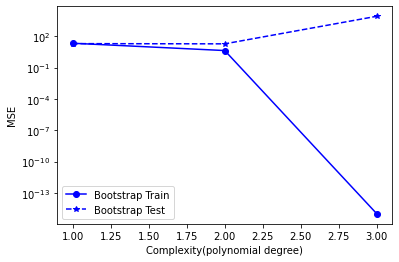

Bootstrap: 
 Minimum MSE reached : 19.0 
 for degree : 2.0

CV: 
 Minimum MSE reached : 37.1 
 for degree : 1.0



In [176]:
#degree of the polynomial model
maxdegree = 3



polydegree = np.zeros(maxdegree)
MSE_boot = np.zeros((maxdegree,2))
MSE_cv = np.zeros((maxdegree,2))


for degree in range(maxdegree):
    
    #set up the model
    poly = PolynomialFeatures(degree+1)
    
    X = poly.fit_transform(x)
    
    
    X_train, X_test, z_train, z_test = train_test_split(np.array(X), np.array(z), test_size=0.2, random_state = rnd_state)
    
    polydegree[degree] = degree+1
    
    MSE_boot_deg = bootstrap_OLS(X_train, X_test, z_train, z_test, n_bs)

    
    MSE_boot[degree, 0] = np.mean(MSE_boot_deg[:,0])
    MSE_boot[degree, 1] = np.mean(MSE_boot_deg[:,1])
    
    MSE_cv[degree, 0], MSE_cv[degree, 1] = cross_validation_OLS(k_folds,X,z)
     

    
    print("For degree ",degree+1)
    print("MSE_boot_train ",MSE_boot[degree, 0])
    print("MSE_boot_test ",MSE_boot[degree, 1])
    print("MSE_cv_train ",MSE_cv[degree, 0])
    print("MSE_cv_test ",MSE_cv[degree, 1])
        
        
#plot the results
plt.plot(polydegree,MSE_boot[:,0],"bo-",label='Bootstrap Train')
plt.plot(polydegree,MSE_boot[:,1],"b*--",label='Bootstrap Test')
# plt.plot(polydegree,MSE_cv[:,0],"ro-",label='Cross Validation Train')
# plt.plot(polydegree,MSE_cv[:,1],"r*--",label='Cross Validation Test')
plt.xlabel('Complexity(polynomial degree)')
plt.ylabel('MSE')
plt.yscale("log")
plt.legend()
plt.show()

print("Bootstrap: \n Minimum MSE reached : {:.1f} \n for degree : {}\n".format(np.min(MSE_boot[:,1]),polydegree[np.argmin(MSE_boot[:,1])]))


print("CV: \n Minimum MSE reached : {:.1f} \n for degree : {}\n".format(np.min(MSE_cv[:,1]),polydegree[np.argmin(MSE_cv[:,1])]))



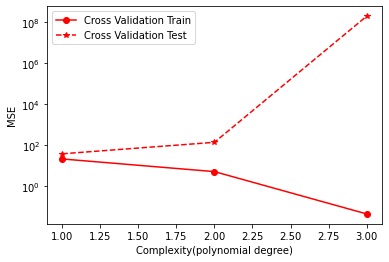

In [177]:
plt.plot(polydegree,MSE_cv[:,0],"ro-",label='Cross Validation Train')
plt.plot(polydegree,MSE_cv[:,1],"r*--",label='Cross Validation Test')
plt.xlabel('Complexity(polynomial degree)')
plt.ylabel('MSE')
plt.yscale("log")
plt.legend()
plt.show()

## 3. Ridge regression without resampling methods

Minimum MSE reached : 6.4 
 for lambda : 0.7906043210907702



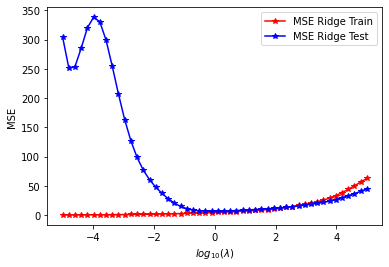

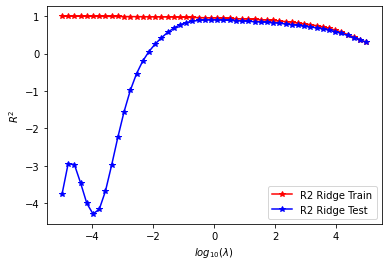

In [178]:
#Let's apply the Ridge regression

sel_degree = 2
nlambdas = 50 
lambd = np.logspace(-5,5, nlambdas)

MSE_Ridge = np.zeros((len(lambd),2))
R2_Ridge = np.zeros((len(lambd),2))

pca_comp = np.zeros(maxdegree)


#set up the model
poly = PolynomialFeatures(sel_degree+1)

X = poly.fit_transform(x)

X_train, X_test, z_train, z_test = train_test_split(np.array(X), np.array(z), test_size=0.2, random_state = rnd_state)

for i in range(nlambdas):
    z_tilde_train, z_tilde_test = Ridge(X_train,X_test,z_train,z_test,lambd[i])
    MSE_Ridge[i,0] = mean_squared_error(z_train, z_tilde_train)
    MSE_Ridge[i,1] = mean_squared_error(z_test, z_tilde_test)
    R2_Ridge[i, 0] = r2_score(z_train, z_tilde_train)
    R2_Ridge[i, 1] = r2_score(z_test, z_tilde_test)
    #print(MSE_Ridge[i,1])

plt.figure()
plt.plot(np.log10(lambd), MSE_Ridge[:,0], 'r*-', label = 'MSE Ridge Train')
plt.plot(np.log10(lambd), MSE_Ridge[:,1], 'b*-', label = 'MSE Ridge Test')
plt.xlabel('$log_{10}(\lambda)$')
plt.ylabel('MSE')
plt.legend()
#print('Lambda to obtain miminum MSE: {:.2f}'.format(lambd[np.argmin(MSE_Ridge[:,1])]))


print("Minimum MSE reached : {:.1f} \n for lambda : {}\n".format(np.min(MSE_Ridge[:,1]),lambd[np.argmin(MSE_Ridge[:,1])]))



plt.figure()
plt.plot(np.log10(lambd), R2_Ridge[:,0], 'r*-', label = 'R2 Ridge Train')
plt.plot(np.log10(lambd), R2_Ridge[:,1], 'b*-', label = 'R2 Ridge Test')
plt.xlabel('$log_{10}(\lambda)$')
plt.ylabel('$R^2$')

plt.legend()
plt.show()


 
 Minimum MSE reached : 6.4 
 for degree : 4.0
 and lambda : 8.5


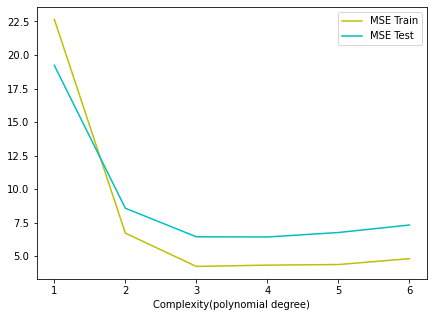

In [179]:
#Ridge
maxdegree = 6

nlambdas = 30 
lambdas = np.logspace(-1,3, nlambdas)


polydegree = np.zeros(maxdegree)

best_lambda = np.zeros(maxdegree)

mse_test_lambda = np.zeros(nlambdas)

MSE_ridge = np.zeros((maxdegree,2))

pca_comp = np.zeros(maxdegree)

for degree in range(maxdegree):
    
    poly = PolynomialFeatures(degree+1)
    
    X = poly.fit_transform(x)
    
    #train-test split
    X_train, X_test, z_train, z_test = train_test_split(np.array(X), np.array(z), test_size=0.2, random_state = rnd_state)
    
    for i in range(nlambdas):
        z_tilde_train, z_tilde_test = Ridge(X_train,X_test,z_train,z_test,lambdas[i])
        mse_test_lambda[i] = mean_squared_error(z_test, z_tilde_test)
        
    best_lambda[degree] = lambdas[np.argmin(mse_test_lambda)]
    #print(best_lambda)
    
    z_tilde_train, z_tilde_test = Ridge(X_train,X_test,z_train,z_test,best_lambda[degree])
    
    polydegree[degree] = degree + 1

    MSE_ridge[degree, 0] = mean_squared_error(z_tilde_train,z_train)
    MSE_ridge[degree, 1] = mean_squared_error(z_tilde_test,z_test)
    

plt.figure(figsize=(7,5))
plt.plot(polydegree, MSE_ridge[:, 0], "y", label='MSE Train')
plt.plot(polydegree, MSE_ridge[:, 1], "c", label='MSE Test')

print(" \n Minimum MSE reached : {:.1f} \n for degree : {}\n and lambda : {:.2}".format(np.min(MSE_ridge[:,1]),polydegree[np.argmin(MSE_ridge[:,1])],best_lambda[np.argmin(MSE_ridge[:,1])]))

plt.xlabel('Complexity(polynomial degree)')
#plt.yscale("log")
plt.legend()
plt.show()

Bootstrap: 
 Minimum MSE reached : 11.0 
 for degree : 3.0
 and lambda : 11.29


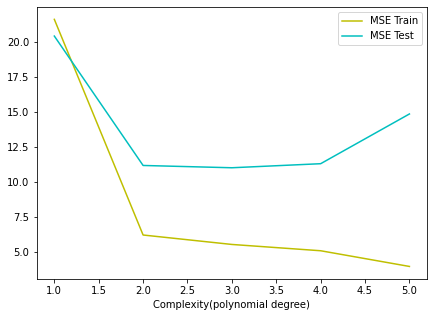

In [300]:
#Bootstrap-Ridge
maxdegree = 5

nlambdas = 20 
lambdas = np.logspace(-1,2,nlambdas)


error_ridge = np.zeros(maxdegree)
bias_ridge = np.zeros(maxdegree)
variance_ridge = np.zeros(maxdegree)

polydegree = np.zeros(maxdegree)

best_lambda = np.zeros(maxdegree)

mse_test_lambda = np.zeros(nlambdas)

MSE_boot_ridge = np.zeros((maxdegree,2))

for degree in range(maxdegree):
    
    poly = PolynomialFeatures(degree+1)
    
    X = poly.fit_transform(x)

    
    #train-test split
    X_train, X_test, z_train, z_test = train_test_split(np.array(X), np.array(z), test_size=0.2, random_state = rnd_state)
 

    for i in range(nlambdas):
        _,_, mse_ridge = bootstrap_Ridge(X_train, X_test, z_train, z_test, n_bs, lambdas[i])
        mse_test_lambda[i] = np.mean(mse_ridge[:,1])
    
    best_lambda[degree] = lambdas[np.argmin(mse_test_lambda)]
    
    z_train_ridge, z_pred_ridge, mse_ridge = bootstrap_Ridge(X_train, X_test, z_train, z_test, n_bootstrap, best_lambda[degree])
    
    
    #reshape test values
    z_t = z_test.reshape(len(z_test),1)
    polydegree[degree] = degree + 1
    
    MSE_boot_ridge[degree, 0] = np.mean(mse_ridge[:,0]) 
    MSE_boot_ridge[degree, 1] = np.mean(mse_ridge[:,1]) 
    

plt.figure(figsize=(7,5))
plt.plot(polydegree, MSE_boot_ridge[:, 0], "y", label='MSE Train')
plt.plot(polydegree, MSE_boot_ridge[:, 1], "c", label='MSE Test')



print("Bootstrap: \n Minimum MSE reached : {:.1f} \n for degree : {}\n and lambda : {:.2f}".format(np.min(MSE_boot_ridge[:,1]),polydegree[np.argmin(MSE_boot_ridge[:,1])],best_lambda[np.argmin(MSE_boot_ridge[:,1])]))

plt.xlabel('Complexity(polynomial degree)')
#plt.yscale("log")
plt.legend()
plt.show()

CV: 
 Minimum MSE reached : 28.1 
 for degree : 2.0
 and lambda : 148.74


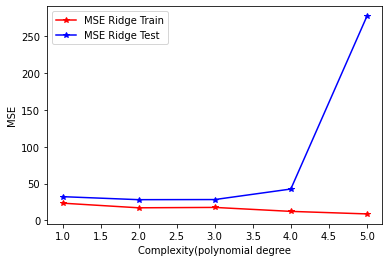

In [301]:
#Cross-Validation



maxdegree = 5



nlambdas = 30 
lambdas = np.logspace(-1,3, nlambdas)
best_lambda = np.zeros(maxdegree)
MSE_cross_Ridge = np.zeros((maxdegree,2))
polydegree = np.zeros(maxdegree)

estimated_mse_sklearn = np.zeros(maxdegree)

mse_test_lambda = np.zeros(nlambdas)

for degree in range(maxdegree):
    
    poly = PolynomialFeatures(degree+1)
    
    X = poly.fit_transform(x)
    

    for i in range(nlambdas):
        _, mse_test_lambda[i] = cross_validation_Ridge(k_folds,X,z,lambdas[i])
    
    
    
    best_lambda[degree] = lambdas[np.argmin(mse_test_lambda)]
    polydegree[degree] = degree + 1
    
    MSE_cross_Ridge[degree,0], MSE_cross_Ridge[degree,1]  = cross_validation_Ridge(k_folds,X,z,best_lambda[degree])
    
    
plt.plot(range(1,maxdegree+1),MSE_cross_Ridge[:,0], 'r*-', label = 'MSE Ridge Train')
plt.plot(range(1,maxdegree+1),MSE_cross_Ridge[:,1], 'b*-', label = 'MSE Ridge Test')
plt.xlabel('Complexity(polynomial degree')
plt.ylabel('MSE')
#plt.yscale("log")
plt.legend()

print("CV: \n Minimum MSE reached : {:.1f} \n for degree : {}\n and lambda : {:.2f}".format(np.min(MSE_cross_Ridge[:,1]),polydegree[np.argmin(MSE_cross_Ridge[:,1])],best_lambda[np.argmin(MSE_cross_Ridge[:,1])]))


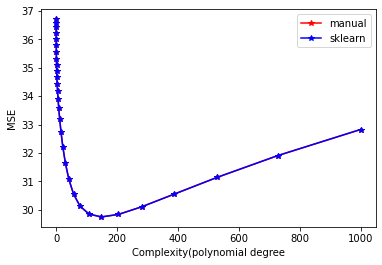

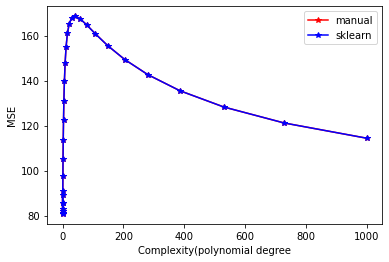

/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual probl

/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual probl

/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual probl

/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual probl

/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual probl

/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual probl

/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.51386e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/P

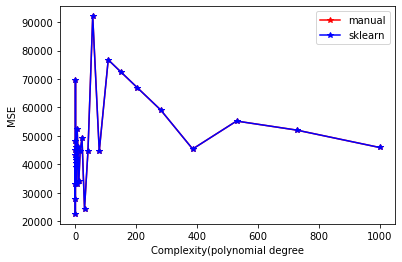

/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual probl

/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual probl

/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual probl

/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual probl

/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual probl

/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual probl

/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual probl

/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual probl

/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual probl

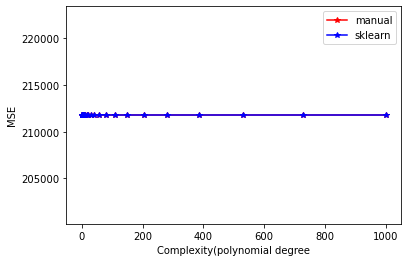

/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual probl

/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=5.59206e-21): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/P

/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=5.59206e-21): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/P

/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=5.59206e-21): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/home/engy/P

/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=5.59206e-21): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/home/engy/P

/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=5.59206e-21): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/P

/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=5.59206e-21): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/P

/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=5.59206e-21): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/P

/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=5.59206e-21): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/P

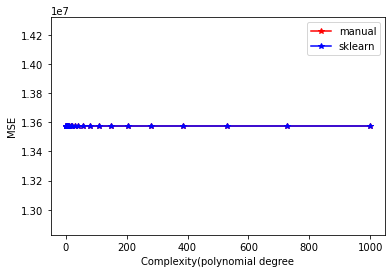

/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/engy/Programs/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual probl

CV: 
 Minimum MSE reached : 29.8 
 for degree : 1.0
 and lambda : 148.74
sklearn:  [2.97537064e+01 8.07264046e+01 2.25660750e+04 2.11790249e+05
 1.35745355e+07]


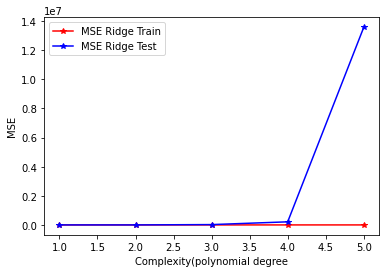

In [286]:
#Cross-Validation


from sklearn.linear_model import Ridge as Ridge_model


def cross_validation_Ridge(k_folds, X, z, lambd):
    MSE_train = []
    MSE_test = []
    kfold = KFold(n_splits = k_folds)

    for train_inds, test_inds in kfold.split(X):
        
        X_train = X[train_inds]
        z_train = z[train_inds]

        X_test = X[test_inds]
        z_test = z[test_inds]

        z_train_tilde_Ridge, z_test_tilde_Ridge = Ridge( X_train, X_test, z_train, z_test, lambd)
        
        MSE_train.append(mean_squared_error(z_train, z_train_tilde_Ridge))
        MSE_test.append(mean_squared_error(z_test, z_test_tilde_Ridge))

    MSE_train_mean = np.mean(MSE_train)
    MSE_test_mean = np.mean(MSE_test)
    

    
    # # Apply the transform to both the training set and the test set

   # scaler = StandardScaler()
   # scaler.fit(X)
   # X= scaler.transform(X)
    
   # pca.fit(X)
   # X_train_pca = pca.transform(X)
    
    z_train =np.asarray(z)                  # Series to array
    z_train = z_train.reshape(len(z),1)     # Reshape because standard scaler expects 2D
    

    ridge = Ridge_model(alpha = lambd)

    kfold = KFold(n_splits = k_folds)
    #fit the model to the training data
    estimated_mse_folds = cross_val_score(ridge, X, z, scoring='neg_mean_squared_error', cv=kfold)
    
    estimated_mse_sklearn = np.mean(-estimated_mse_folds)

    
    
    
    return MSE_train_mean, MSE_test_mean, estimated_mse_sklearn


maxdegree = 5



nlambdas = 30 
lambdas = np.logspace(-1,3, nlambdas)
best_lambda = np.zeros(maxdegree)
best_lambda_sklearn = np.zeros(maxdegree)
MSE_cross_Ridge = np.zeros((maxdegree,2))
polydegree = np.zeros(maxdegree)

estimated_mse_sklearn = np.zeros(maxdegree)

mse_test_lambda = np.zeros(nlambdas)

mse_test_lambda_sklearn = np.zeros(nlambdas)

for degree in range(maxdegree):
    
    poly = PolynomialFeatures(degree+1)
    
    X = poly.fit_transform(x)
    

    for i in range(nlambdas):
        _, mse_test_lambda[i], mse_test_lambda_sklearn[i]  = cross_validation_Ridge(k_folds,X,z,lambdas[i])
    
    plt.plot(lambdas,mse_test_lambda, 'r*-', label = 'manual')
    plt.plot(lambdas,mse_test_lambda_sklearn, 'b*-', label = 'sklearn')
    plt.xlabel('Complexity(polynomial degree')
    plt.ylabel('MSE')
    #plt.yscale("log")
    plt.legend()
    plt.show()
    
    best_lambda[degree] = lambdas[np.argmin(mse_test_lambda)]
    best_lambda_sklearn[degree] = lambdas[np.argmin(mse_test_lambda_sklearn)]

    polydegree[degree] = degree + 1
    
    MSE_cross_Ridge[degree,0], MSE_cross_Ridge[degree,1], sklearn_mse  = cross_validation_Ridge(k_folds,X,z,best_lambda_sklearn[degree])
    

    
    estimated_mse_sklearn[degree] = sklearn_mse
    
plt.plot(range(1,maxdegree+1),MSE_cross_Ridge[:,0], 'r*-', label = 'MSE Ridge Train')
plt.plot(range(1,maxdegree+1),MSE_cross_Ridge[:,1], 'b*-', label = 'MSE Ridge Test')
plt.xlabel('Complexity(polynomial degree')
plt.ylabel('MSE')
#plt.yscale("log")
plt.legend()

print("CV: \n Minimum MSE reached : {:.1f} \n for degree : {}\n and lambda : {:.2f}".format(np.min(MSE_cross_Ridge[:,1]),polydegree[np.argmin(MSE_cross_Ridge[:,1])],best_lambda[np.argmin(MSE_cross_Ridge[:,1])]))
print("sklearn: ",estimated_mse_sklearn)

CV: 
 Minimum MSE reached : 28.1 
 for degree : 2.0
 and lambda : 148.74
[32.18093539 28.09036617 28.24524824 42.56098922]


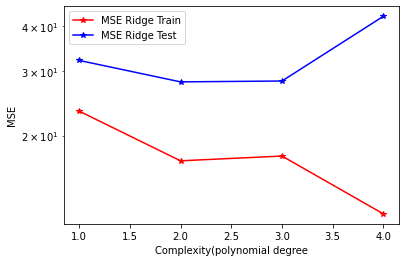

In [192]:
plt.plot(range(1,maxdegree+1),MSE_cross_Ridge[:,0], 'r*-', label = 'MSE Ridge Train')
plt.plot(range(1,maxdegree+1),MSE_cross_Ridge[:,1], 'b*-', label = 'MSE Ridge Test')
plt.xlabel('Complexity(polynomial degree')
plt.ylabel('MSE')
plt.yscale("log")
plt.legend()

print("CV: \n Minimum MSE reached : {:.1f} \n for degree : {}\n and lambda : {:.2f}".format(np.min(MSE_cross_Ridge[:,1]),polydegree[np.argmin(MSE_cross_Ridge[:,1])],best_lambda[np.argmin(MSE_cross_Ridge[:,1])]))
print(MSE_cross_Ridge[:,1])

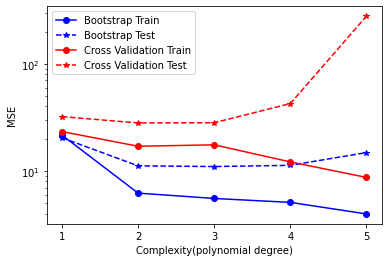

In [312]:
#plot the results
plt.figure(figsize=(6,4))
plt.plot(polydegree,MSE_boot_ridge[:,0],"bo-",label='Bootstrap Train')
plt.plot(polydegree,MSE_boot_ridge[:,1],"b*--",label='Bootstrap Test')
plt.plot(polydegree,MSE_cross_Ridge[:,0],"ro-",label='Cross Validation Train')
plt.plot(polydegree,MSE_cross_Ridge[:,1],"r*--",label='Cross Validation Test')
plt.xlabel('Complexity(polynomial degree)')
plt.xticks(polydegree)
plt.ylabel('MSE')
plt.yscale("log")
plt.legend()
plt.savefig("Pictures/Boston_comparison.png")

In [252]:
degree = 2

MSE_cross_Ridge = np.zeros((5,2))
nlambdas = 30 
lambdas = np.logspace(-1,3, nlambdas)

for j in range(5):
    
    poly = PolynomialFeatures(degree)
    
    X = poly.fit_transform(x)
    
    #train-test split
    X_train, X_test, z_train, z_test = train_test_split(np.array(X), np.array(z), test_size=0.2)
    
    for i in range(nlambdas):
        z_tilde_train, z_tilde_test = Ridge(X_train,X_test,z_train,z_test,lambdas[i])
        mse_test_lambda[i] = mean_squared_error(z_test, z_tilde_test)
        
    best_lambda[degree] = lambdas[np.argmin(mse_test_lambda)]
    
    z_tilde_train, z_tilde_test = Ridge(X_train,X_test,z_train,z_test,best_lambda[degree])
    
    
    MSE_ridge[j,0] = mean_squared_error(z_tilde_train,z_train)
    MSE_ridge[j,1] = mean_squared_error(z_tilde_test,z_test)
    

print(np.mean(MSE_ridge,axis=0))

[ 6.08857701 13.2737684 ]
